<a href="https://colab.research.google.com/github/jpandersen61/SQLLiteNotebooks/blob/main/Establishing_a_relational_database_Sales_System_SQLLite_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Etablering relational salgssystem database

###ER-Diagram

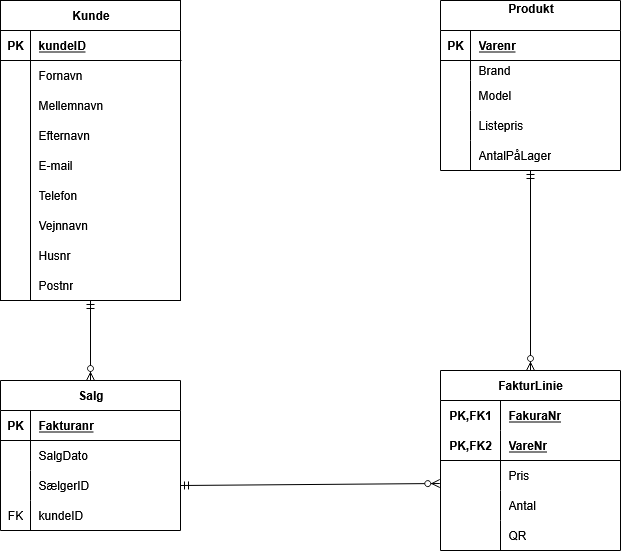

###Opgaver

Etabler en database jf. ovenstående ER-Diagram:
1.   Færdiggør Kunde-tabellen -> Tilføj resterende attributter (CREATE TABLE)
2.   Færdiggør testdata -> Tilføj flere kunder (INSERT INTO)
1.   Vis den færdige Kunde-tabel (SELECT FROM)    
1.   Opret herefter en Produkt-tabel (CREATE TABLE)
2.   Importer testdata i Produkt-tabel (INSERT INTO)
1.   Vis den færdige Produkt-tabel (SELECT FROM)
2.   Gør på tilsvarende vis med Salg-tabellen
1.   Etabler relation mellem Kunde-tabel og Salg-tabel
2.   Opret også FakturaLinie-tabellen på samme måde som for de øvrige tabeller
1.   Etabler viste relationer mellem FakturaLinie tabellen øvrige tabeller

P.S. Husk DROP TABLE statements











###Importing needed modules

In [1]:
import pandas as pd
import sqlite3

###Connecting to the database

I denne notebook benyttes [SQLite](https://sqlite.org/) databasen, der som det antydes er 'light', men som alligevel er OK til vores formål her, hvilket er at demonstrere, hvordan en database oprettes med SQL.

In [2]:
#Get connection to the sales system data - initially get an empty one
SQLiteConnetion = sqlite3.connect('salessystem.db')

In [3]:
# create cursor object
SQLiteCursor = SQLiteConnetion.cursor()

###Drop eksisterende tabeller

Nedenstående SQL script bliver udført for at "rydde" databasen

In [4]:
SQLDropTableScript = """
DROP TABLE IF EXISTS Kunde;
DROP TABLE IF EXISTS Produkt;
DROP TABLE IF EXISTS Salg;
DROP TABLE IF EXISTS FakturaLinie;
"""

In [5]:
SQLiteCursor.executescript(SQLDropTableScript)

###Etabler Kunde-tabel

In [6]:
#Define CREATE TABLE statement for Kunde
SQLCreateTableKunde = """
CREATE TABLE Kunde(
    KundeID int NOT NULL PRIMARY KEY,
    Fornavn VARCHAR(30) NOT NULL,
    Efternavn VARCHAR(50) NOT NULL,
    Mellemnavn VARCHAR(50),
    EMail VARCHAR(50),
    Telefon VARCHAR(10),
    Vejnavn VARCHAR(50),
    Husnummer VARCHAR(5),
    Postnummer VARCHAR(4)
)
"""


In [7]:
#Run CREATE TABLE statement in SQLite
SQLiteCursor.execute(SQLCreateTableKunde)

In [8]:
#Define INSERT INTO statement for Kunde
SQLInsertIntoKunde = """
INSERT INTO Kunde (KundeID, Fornavn, Efternavn, Mellemnavn, EMail, Telefon, Vejnavn, Husnummer,Postnummer)
VALUES
(1,'Jens','Pedersen', NULL, 'jepe@gmail.com','4512345678', 'Maglevej', '42C', '4700'),
(2,'Anders','And', 'Donald','d_duck@hotmail.com', '4587654321', 'Lillevej', '13', '4700'),
(3,'Hans','Olsen', NULL, 'hol@outlook.dk','21436587', 'Mellemvej', '34B', '4000'),
(4,'Anna','Hansen', 'Lise', 'AnnaH@outlook.dk','78563412', 'Maglelillevej', '99', '4000')
"""


In [9]:
#Run INSERT INTO statement in SQLite
SQLiteCursor.execute(SQLInsertIntoKunde)

In [10]:
#Define SELECT...FROM statement for extracting all data from the Kunde table
SQLSelectAllFromKunde = """
SELECT * FROM Kunde
"""

In [11]:
#Get DataFrame with Kunde data by applying the SELECT...FROM statement on the SQLiteConnetion
DataFrameSelectAllFromKunde = pd.read_sql(SQLSelectAllFromKunde, SQLiteConnetion)

#Replace empty values with blank
DataFrameSelectAllFromKunde=DataFrameSelectAllFromKunde.fillna('')

#Display DataFrame
DataFrameSelectAllFromKunde

,KundeID,Fornavn,Efternavn,Mellemnavn,EMail,Telefon,Vejnavn,Husnummer,Postnummer
0,1,Jens,Pedersen,,jepe@gmail.com,4512345678,Maglevej,42C,4700
1,2,Anders,And,Donald,d_duck@hotmail.com,4587654321,Lillevej,13,4700
2,3,Hans,Olsen,,hol@outlook.dk,21436587,Mellemvej,34B,4000
3,4,Anna,Hansen,Lise,AnnaH@outlook.dk,78563412,Maglelillevej,99,4000


### Etabler Produkt-tabel

In [12]:
#Define CREATE TABLE statement for Produkt
SQLCreateTableProdukt = """
CREATE TABLE Produkt(
       VareNr INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
       Brand VARCHAR(30) NOT NULL,
       Model VARCHAR(40) NOT NULL,
       Listepris FLOAT,
       AntalPaaLager int NOT NULL
       )
       """

In [13]:
#Run CREATE TABLE statement in SQLite
SQLiteCursor.execute(SQLCreateTableProdukt)

In [14]:
#Define INSERT INTO statement for Produkt
SQLInsertIntoProdukt = """
INSERT INTO Produkt (Brand, Model, Listepris, AntalPaaLager)
VALUES
    ('Samsung', 'Galaxy S23', 999.99, 100),
    ('Sony', 'WH-1000XM5', 349.99, 150),
    ('LG', 'OLED55CX6LA', 1299.99, 50),
    ('Apple', 'iPhone 14', 1099.99, 200),
    ('Bose', 'QuietComfort 45', 329.99, 75),
    ('Microsoft', 'Surface Laptop 5', 1599.99, 60),
    ('Canon', 'EOS R6', 2499.99, 30),
    ('HP', 'Omen 15', 1199.99, 120),
    ('Lenovo', 'ThinkPad X1 Carbon', 1899.99, 80),
    ('Asus', 'ROG Strix G15', 1499.99, 100),
    ('Samsung', 'QLED 4K TV', 799.99, 65),
    ('Seagate', 'Expansion Portable 1TB', 59.99, 300),
    ('JBL', 'Charge 5', 179.99, 180),
    ('Razer', 'DeathAdder V2', 69.99, 200),
    ('GoPro', 'Hero 10 Black', 499.99, 90),
    ('Apple', 'MacBook Air M1', 999.99, 110),
    ('Sony', 'PlayStation 5', 499.99, 50),
    ('LG', '27GN950-B', 1299.99, 40),
    ('Nikon', 'Z50', 859.99, 70),
    ('Samsung', 'Galaxy Tab S7', 649.99, 130)
    """

In [15]:
#Run INSERT INTO statement in SQLite
SQLiteCursor.execute(SQLInsertIntoProdukt)

In [16]:
#Define SELECT...FROM statement for extracting all data from the Produkt table
SQLSelectAllFromProdukt = """
SELECT * FROM Produkt
"""

In [17]:
#Get DataFrame with Produkt data by applying the SELECT...FROM statement on the SQLiteConnetion
DataFrameSelectAllFromProdukt = pd.read_sql(SQLSelectAllFromProdukt, SQLiteConnetion)

#Replace empty values with blank
DataFrameSelectAllFromProdukt=DataFrameSelectAllFromProdukt.fillna('')

#Display DataFrame
DataFrameSelectAllFromProdukt

,VareNr,Brand,Model,Listepris,AntalPaaLager
0,1,Samsung,Galaxy S23,999.99,100
1,2,Sony,WH-1000XM5,349.99,150
2,3,LG,OLED55CX6LA,1299.99,50
3,4,Apple,iPhone 14,1099.99,200
4,5,Bose,QuietComfort 45,329.99,75
5,6,Microsoft,Surface Laptop 5,1599.99,60
6,7,Canon,EOS R6,2499.99,30
7,8,HP,Omen 15,1199.99,120
8,9,Lenovo,ThinkPad X1 Carbon,1899.99,80
9,10,Asus,ROG Strix G15,1499.99,100


### Etabler Salg-tabel

In [18]:
#Define CREATE TABLE statement for Salg
SQLCreateTableSalg = """
CREATE TABLE Salg(
       FakturaNr INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
       SalgsDato DATE NOT NULL,
       SaelgerID VARCHAR(30) NOT NULL,
       KundeID int NOT NULL,
       FOREIGN KEY (KundeID) REFERENCES Kunde (KundeID))
       """

In [19]:
#Run CREATE TABLE statement in SQLite
SQLiteCursor.execute(SQLCreateTableSalg)

In [20]:
#Define INSERT INTO statement for Salg
SQLInsertIntoSalg = """
INSERT INTO Salg (SalgsDato, SaelgerID, KundeID)
VALUES
    ('2025-04-01', 'Alice Jensen', 1),
    ('2025-04-02', 'Brian Sørensen', 2),
    ('2025-04-03', 'Charlotte Nielsen', 3),
    ('2025-04-04', 'David Mortensen', 4),
    ('2025-04-05', 'Eva Thomsen', 1),
    ('2025-04-06', 'Frank Larsen', 2)
    """

In [21]:
#Run INSERT INTO statement in SQLite
SQLiteCursor.execute(SQLInsertIntoSalg)

In [22]:
#Define SELECT...FROM statement for extracting all data from the Salg table
SQLSelectAllFromSalg = """
SELECT * FROM Salg
"""

In [23]:
#Get DataFrame with Salg data by applying the SELECT...FROM statement on the SQLiteConnetion
DataFrameSelectAllFromSalg = pd.read_sql(SQLSelectAllFromSalg, SQLiteConnetion)

#Replace empty values with blank
DataFrameSelectAllFromSalg=DataFrameSelectAllFromSalg.fillna('')

#Display DataFrame
DataFrameSelectAllFromSalg

,FakturaNr,SalgsDato,SaelgerID,KundeID
0,1,2025-04-01,Alice Jensen,1
1,2,2025-04-02,Brian Sørensen,2
2,3,2025-04-03,Charlotte Nielsen,3
3,4,2025-04-04,David Mortensen,4
4,5,2025-04-05,Eva Thomsen,1
5,6,2025-04-06,Frank Larsen,2


###Etabler FakturaLinie tabel

In [24]:
#Define CREATE TABLE statement for FakturaLinie
SQLCreateTableFakturaLinie = """
CREATE TABLE FakturaLinie(
       Antal int NOT NULL,
       Pris Float NOT NULL,
       Varenr int NOT NULL,
       Fakturanr int NOT NULL,
       FOREIGN KEY(Varenr) REFERENCES Produkt(Varenr),
       FOREIGN KEY(Fakturanr) REFERENCES Salg(Fakturanr),
       Primary KEY (Varenr, Fakturanr))
       """

In [25]:
#Run CREATE TABLE statement in SQLite
SQLiteCursor.execute(SQLCreateTableFakturaLinie)

In [28]:
#Define INSERT INTO statement for FakturaLinie
SQLInsertIntoFakturaLinie = """
INSERT INTO FakturaLinie (Antal, Pris, Varenr, Fakturanr)
VALUES
    (1, 1299.99,  3, 2),   -- LG OLED TV in Sale #2
    (2, 329.99,  5, 3),    -- Bose QC 45 x2 in Sale #3
    (1, 2499.99,  7, 4),   -- Canon EOS R6 in Sale #4
    (1, 1899.99,  9, 5),   -- ThinkPad X1 Carbon in Sale #5
    (2, 179.99, 13, 6),    -- JBL Charge 5 x2 in Sale #6
    (1, 69.99, 14, 1),     -- Razer Mouse in Sale #1
    (1, 1199.99,  8, 2),   -- HP Omen in Sale #2
    (3, 799.99, 11, 3),    -- Samsung QLED TV x3 in Sale #3
    (2, 1299.99, 18, 4),   -- LG Monitor x2 in Sale #4
    (1, 1599.99, 6, 5),    -- Surface Laptop in Sale #5
    (1, 499.99, 15, 6),    -- GoPro Hero 10 in Sale #6
    (2, 649.99, 20, 1),    -- Galaxy Tab S7 x2 in Sale #1
    (1, 499.99, 17, 2),    -- PlayStation 5 in Sale #2
    (2, 859.99, 19, 5),    -- Nikon Z50 x2 in Sale #5
    (1, 999.99,  1, 6)     -- Galaxy S23 in Sale #6
    """

In [29]:
#Run CREATE TABLE statement in SQLite
SQLiteCursor.execute(SQLInsertIntoFakturaLinie)

In [34]:
#Define SELECT...FROM statement for extracting all data from the FakturaLinie table
SQLSelectAllFromFakturaLinie = """
SELECT * FROM FakturaLinie
"""

In [36]:
#Get DataFrame with FakturaLinie data by applying the SELECT...FROM statement on the SQLiteConnetion
DataFrameSelectAllFromFakturaLinie = pd.read_sql(SQLSelectAllFromFakturaLinie, SQLiteConnetion)

#Replace empty values with blank
DataFrameSelectAllFromFakturaLinie=DataFrameSelectAllFromFakturaLinie.fillna('')

#Display DataFrame
DataFrameSelectAllFromFakturaLinie

,Antal,Pris,Varenr,Fakturanr
0,1,1299.99,3,2
1,2,329.99,5,3
2,1,2499.99,7,4
3,1,1899.99,9,5
4,2,179.99,13,6
5,1,69.99,14,1
6,1,1199.99,8,2
7,3,799.99,11,3
8,2,1299.99,18,4
9,1,1599.99,6,5
